Based on example from https://colab.research.google.com/github/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb

In [6]:
# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

In [17]:
# Helper functions
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

def resize_image(image, new_width=256, new_height=256,
                              display=False):
  pil_image = Image.open(image)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert("RGB")
  if display:
    display_image(pil_image)
  return pil_image_rgb

In [18]:
testimage = "/Users/tarensanders/Google Drive/Dropbox - Taren Files (To Sort)/Projects/TF_Test_Project/Photos to test Inception/With Screens/IMG_4131.jpg"


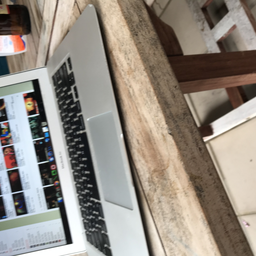

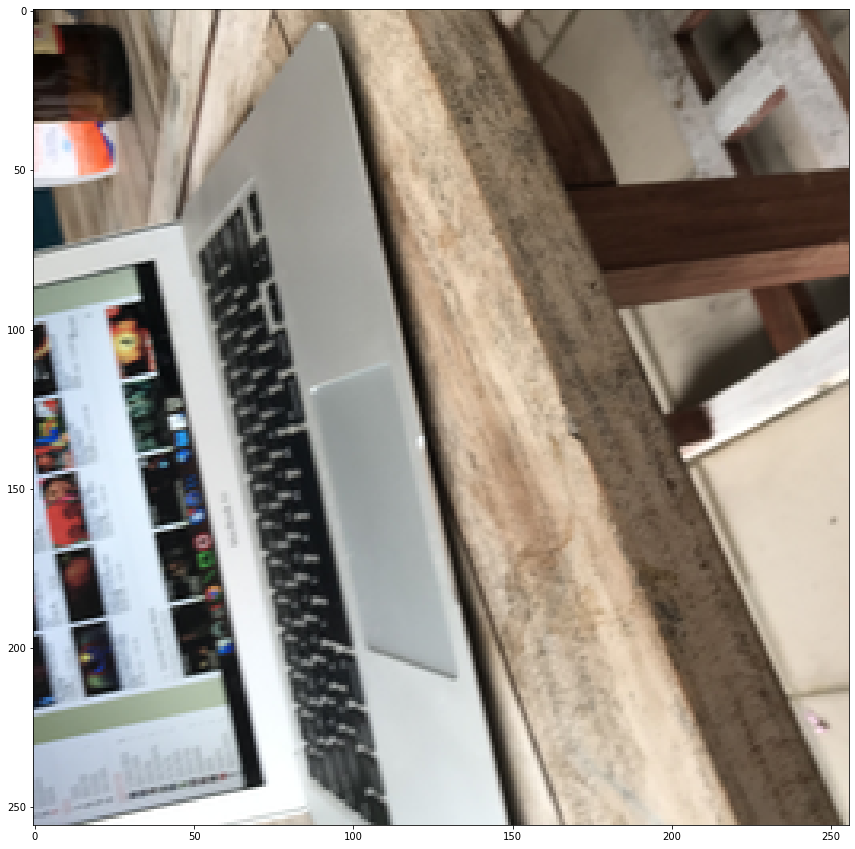

In [19]:
resize_image(testimage, display=True)

In [20]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [22]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [23]:
path = testimage

In [ ]:
img = load_img(path)

converted_img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
result = detector(converted_img)

In [ ]:
result